In [1]:
# Load your encoded and scaled dataset
import pandas as pd
data = pd.read_csv('./data/encoded_scaled_data.csv')

# Calculate summary statistics
summary_statistics = data.describe()
print(summary_statistics)


       educational.model           age  online.test  english.evaluation  \
count            24317.0  2.431700e+04      24317.0        24317.000000   
mean                 0.0 -4.675200e-16          0.0            0.000000   
std                  0.0  1.000021e+00          0.0            1.000021   
min                  0.0 -1.724144e+00          0.0           -0.359876   
25%                  0.0 -2.972643e-01          0.0           -0.359876   
50%                  0.0 -2.972643e-01          0.0           -0.359876   
75%                  0.0  4.161758e-01          0.0           -0.359876   
max                  0.0  2.824034e+01          0.0            3.095868   

       admission.rubric     retention  dropout.semester  physical.education  \
count      2.431700e+04  2.431700e+04      2.431700e+04        2.431700e+04   
mean       1.683072e-16 -5.610240e-17      3.973920e-17       -2.454480e-17   
std        1.000021e+00  1.000021e+00      1.000021e+00        1.000021e+00   
min     

Data Visualization

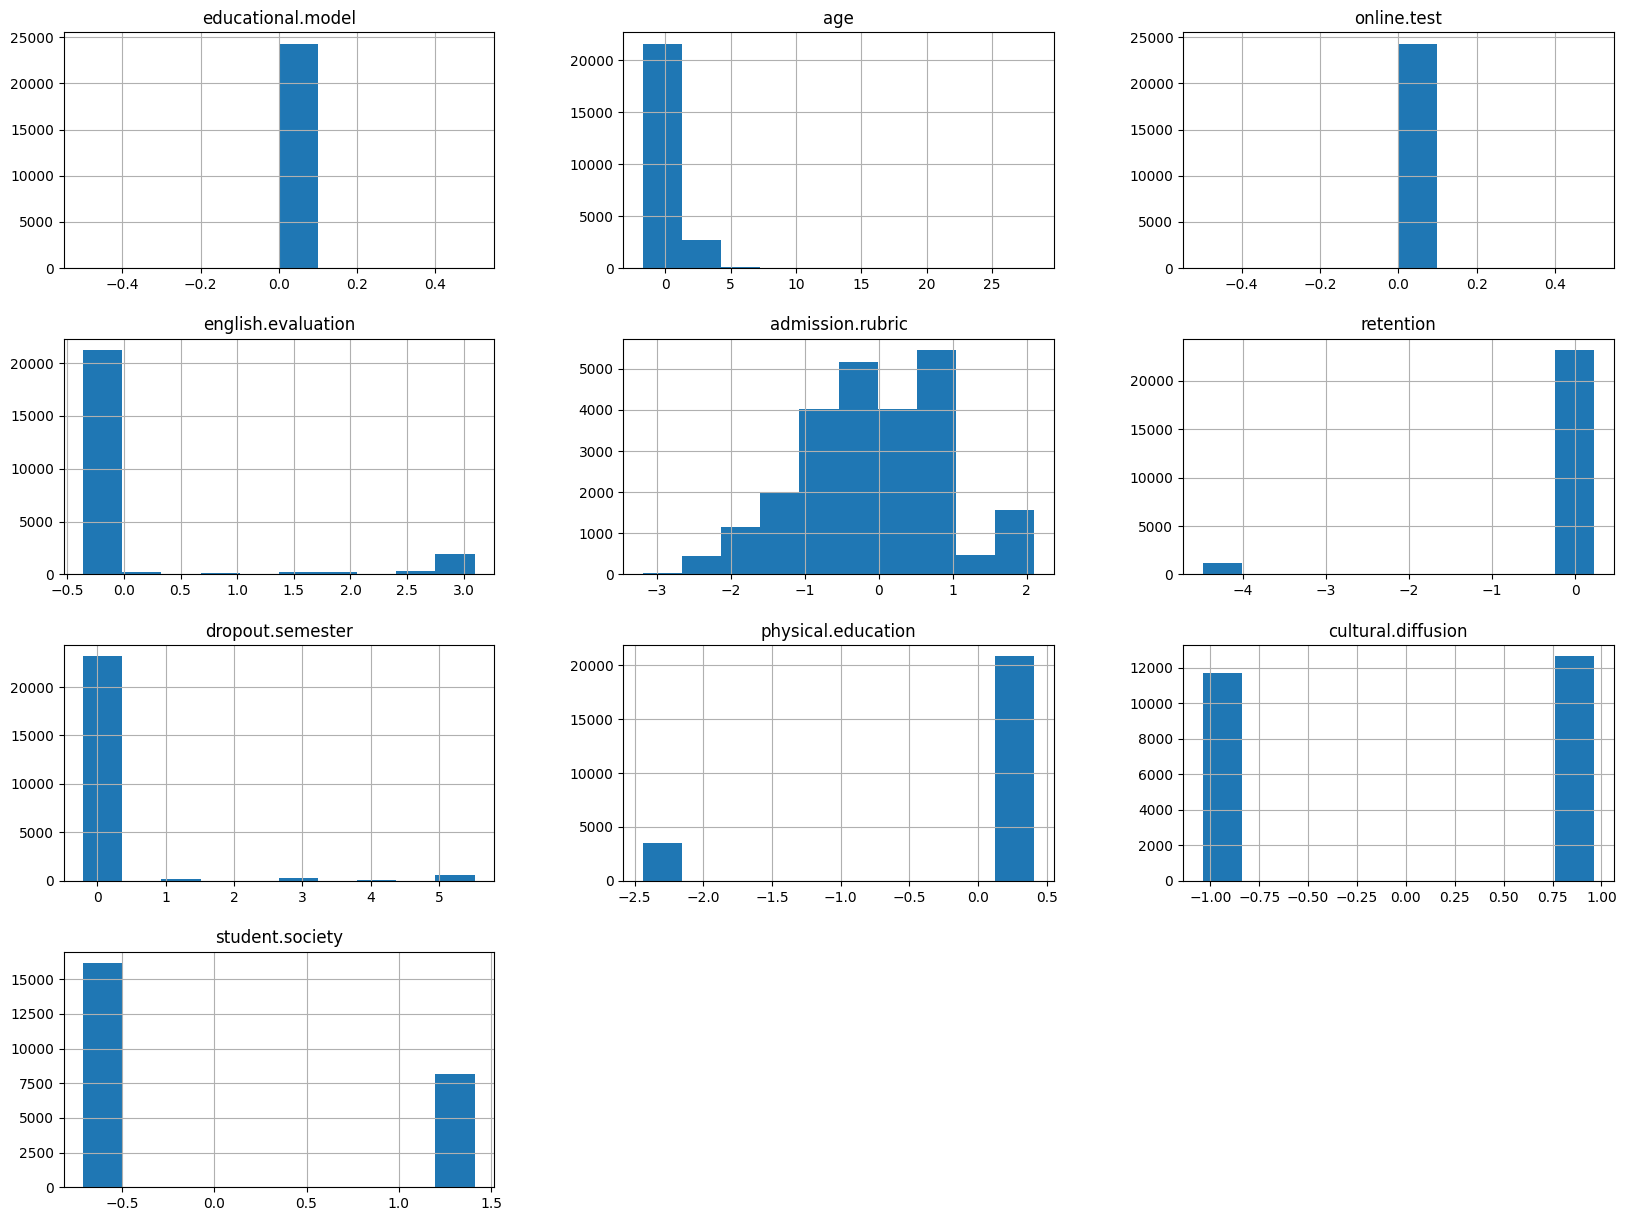

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numerical features
data.hist(figsize=(20, 15))
plt.show()




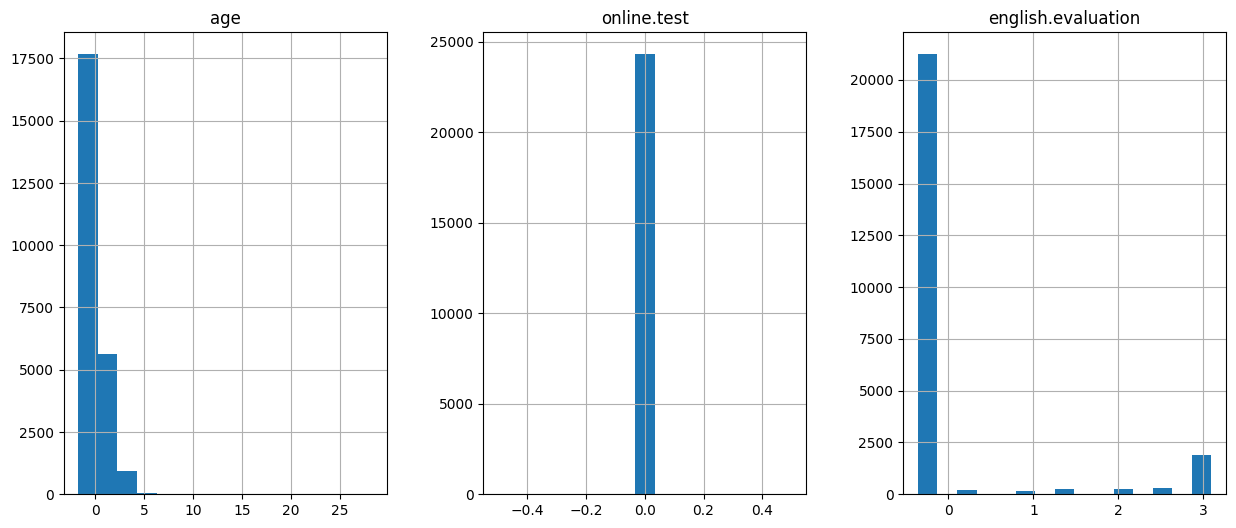

In [3]:
# Plot histograms for some selected numerical features
selected_columns = ['age', 'online.test', 'english.evaluation']  # adjust this based on your key features
data[selected_columns].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()

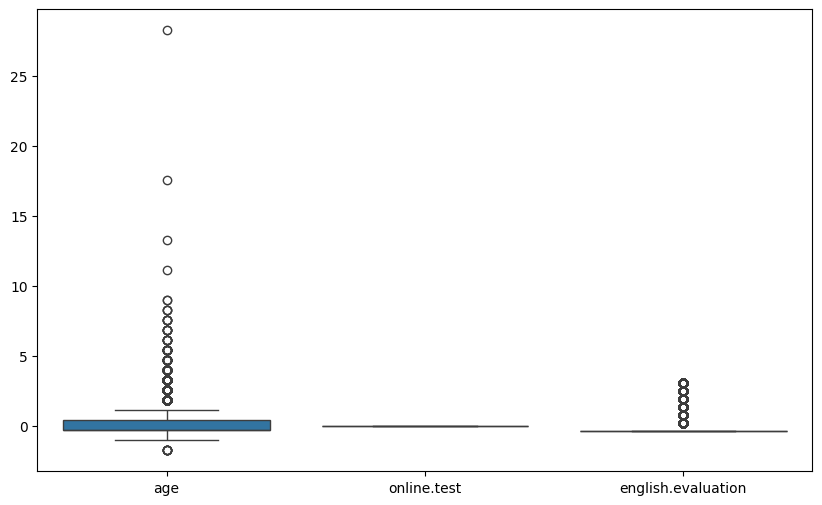

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[selected_columns])
plt.show()

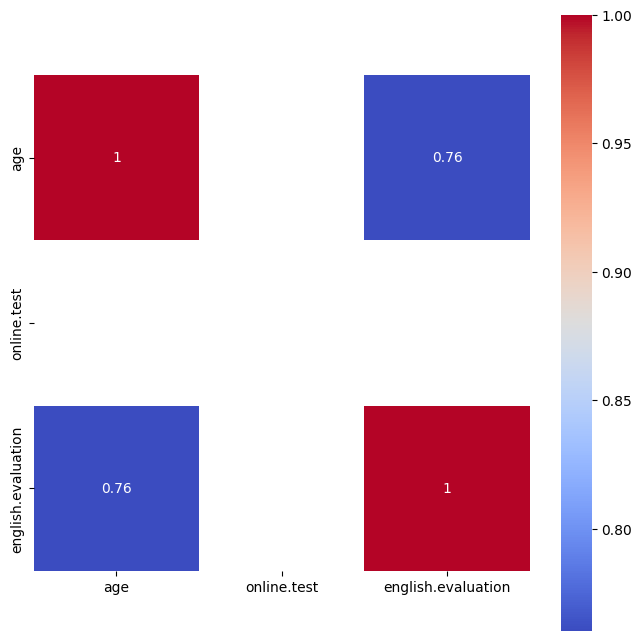

In [5]:
# Correlation matrix heatmap
correlation_matrix = data[selected_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, square=True, cmap='coolwarm')
plt.show()

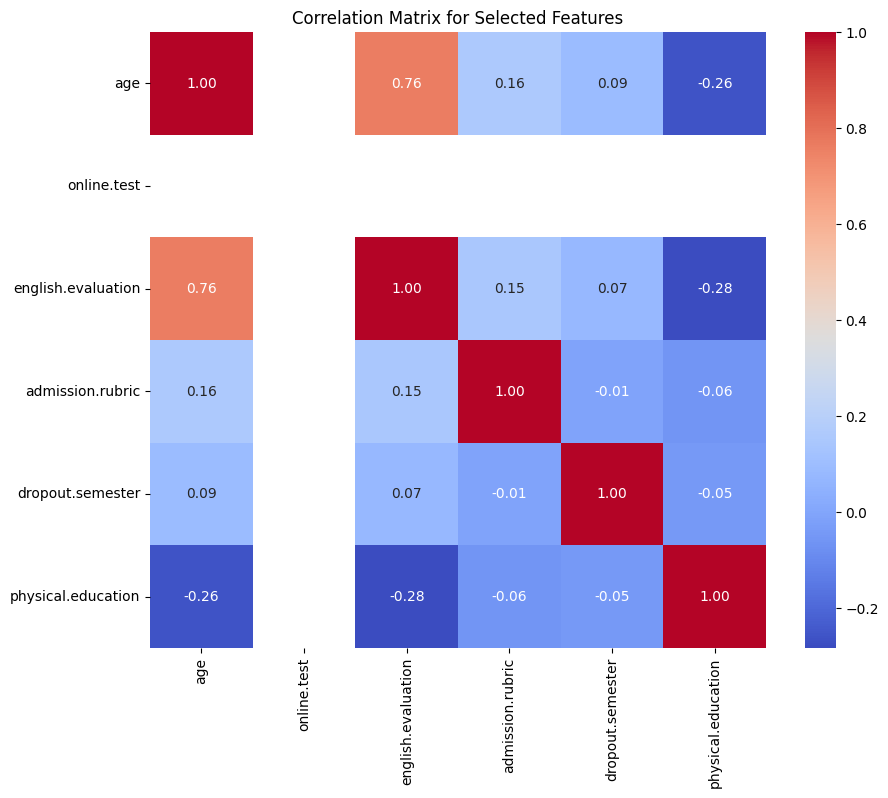

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('./data/encoded_scaled_data.csv')

# List of selected features for the correlation matrix
selected_columns = [
    'age', 'level', 'english.evaluation',  # existing features
    'admission.rubric', 'dropout.semester', 'physical.education'  # additional features
]

# Creating a subset of the data with the selected columns
data_subset = data[selected_columns]

# Calculating the correlation matrix
correlation_matrix = data_subset.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, square=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


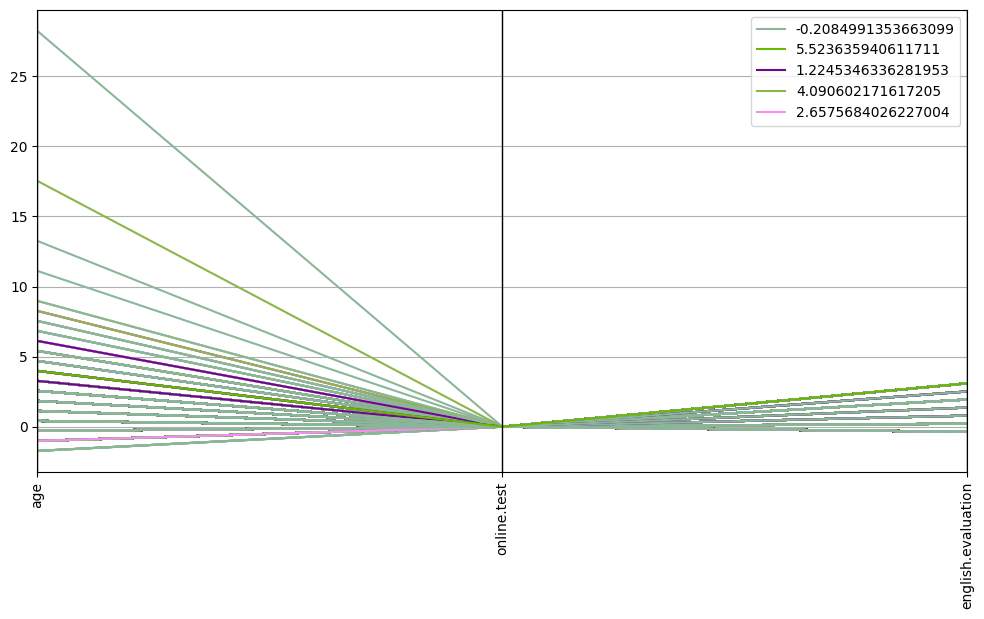

In [ ]:
from pandas.plotting import parallel_coordinates

# Select a subset of columns for visualization, including the target variable if applicable
selected_columns = ['age', 'level', 'english.evaluation', 'dropout.semester']  # Add your target variable here
data_subset = data[selected_columns]

# Parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(data_subset, 'dropout.semester')  # Use your target variable as class_column
plt.xticks(rotation=90)
plt.show()


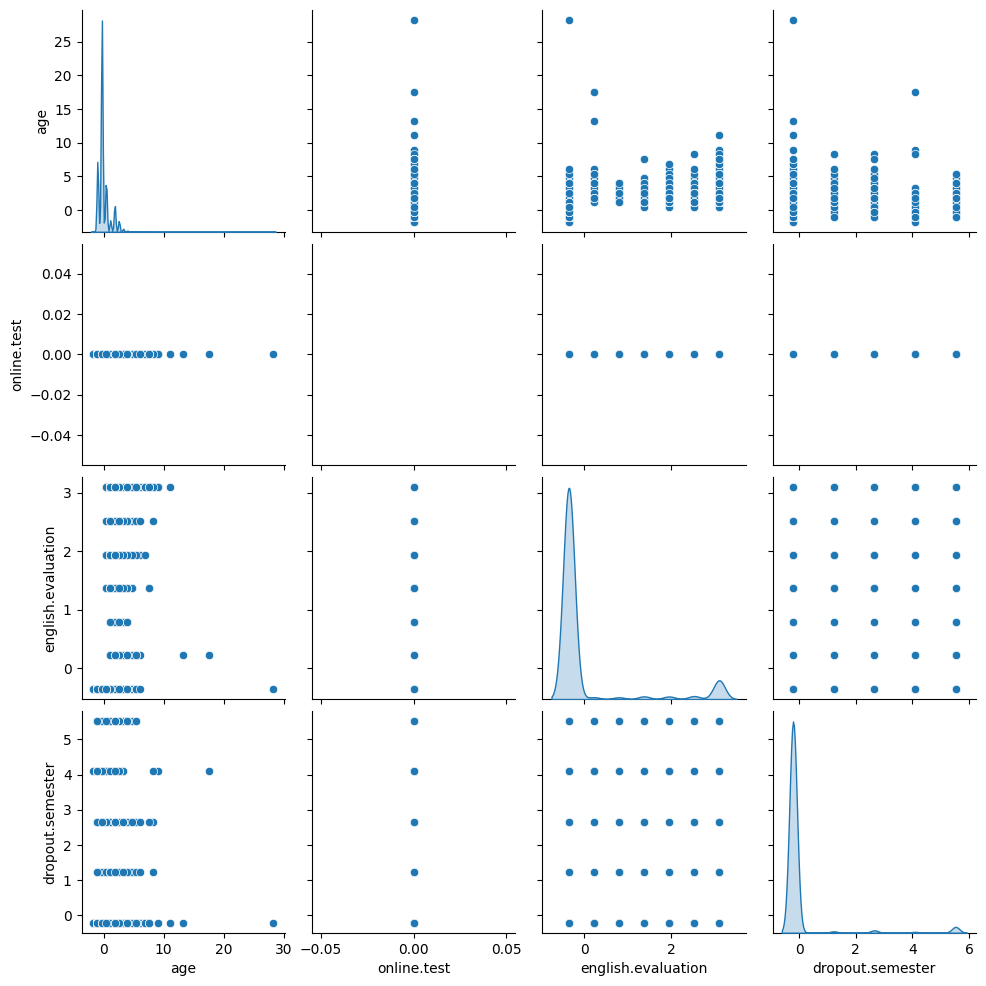

In [ ]:
sns.pairplot(data[selected_columns], diag_kind='kde')
plt.show()


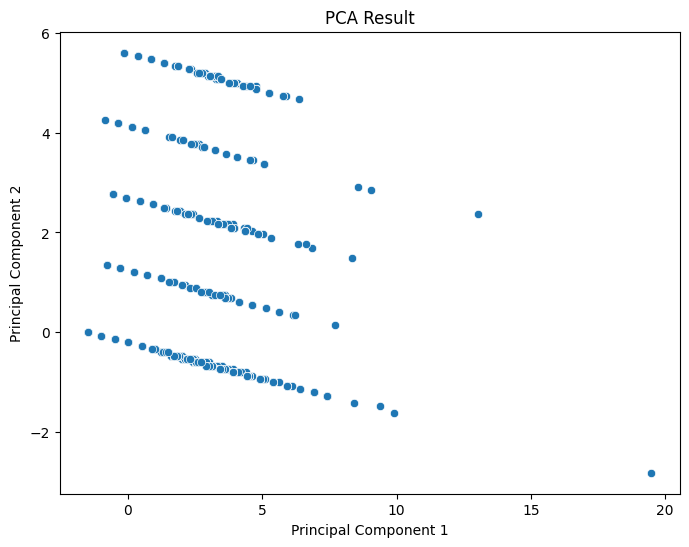

In [ ]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reducing to two components for 2D visualization
principal_components = pca.fit_transform(data[selected_columns])

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


C:\Users\rogel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 24317 samples in 0.027s...
[t-SNE] Computed neighbors for 24317 samples in 2.638s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24317
[t-SNE] Computed conditional probabilities for sample 2000 / 24317
[t-SNE] Computed conditional probabilities for sample 3000 / 24317
[t-SNE] Computed conditional probabilities for sample 4000 / 24317
[t-SNE] Computed conditional probabilities for sample 5000 / 24317
[t-SNE] Computed conditional probabilities for sample 6000 / 24317
[t-SNE] Computed conditional probabilities for sample 7000 / 24317
[t-SNE] Computed conditional probabilities for sample 8000 / 24317
[t-SNE] Computed conditional probabilities for sample 9000 / 24317
[t-SNE] Computed conditional probabilities for sample 10000 / 24317
[t-SNE] Computed conditional probabilities for sample 11000 / 24317
[t-SNE] Computed conditional probabilities for sample 12000 / 24317
[t-SNE] Computed conditional probabilities for sa

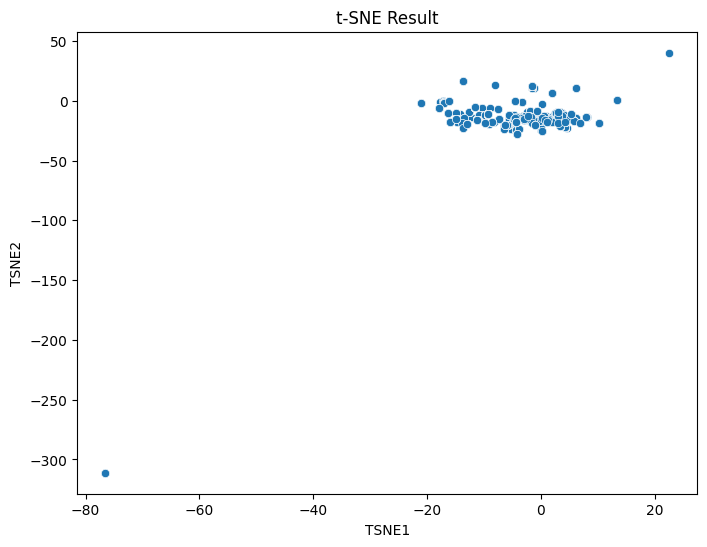

In [ ]:
from sklearn.manifold import TSNE

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data[selected_columns])

# Create a DataFrame for the t-SNE components
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])

# Plot the t-SNE components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df)
plt.title('t-SNE Result')
plt.show()
